# Unsupervised Learning

In [0]:
from google.colab import drive
import os

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras import backend as K

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.utils.linear_assignment_ import linear_assignment
from sklearn.mixture import GaussianMixture

In [29]:
# Reading the data from Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
os.chdir('/content/drive/My Drive/MLP3/data_with_notebook/scripts')

In [0]:
import util_mnist_reader as mnist_reader

In [0]:
# Loading the fashion-MNIST data
root_path="/content/drive/My Drive/MLP3/data_with_notebook/"

X_train, y_train = mnist_reader.load_mnist(root_path+'data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist(root_path+'data/fashion', kind='t10k')

In [0]:
# Normalizing the data
X_train=X_train/255.0
X_test=X_test/255.0

# 1. K Means

In [0]:
# Applying the KMeans Algorithm
km = KMeans(n_clusters=10, init='k-means++', n_init=10, max_iter=1000, tol=1e-04, random_state=0, algorithm='full', precompute_distances=True)


In [43]:
#Training and Testing the KMeans Model
y_km_train = km.fit_predict(X_train)
y_km_test = km.fit_predict(X_test)
print ("Trainnig Accuracy:", metrics.normalized_mutual_info_score(y_km_train, y_train)*100)
print ("Test Accuracy:", metrics.normalized_mutual_info_score(y_km_test, y_test)*100)

Trainnig Accuracy: 51.17861099627588
Test Accuracy: 51.471238082762305


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


# 2. Autoencoder with K Means

In [0]:
# Reshaping the input data for convolutional layers
X_train = X_train.reshape((len(X_train), 28, 28, 1))
X_test = X_test.reshape((len(X_test), 28, 28, 1))

In [45]:
# Building the AutoEncoder
autoencoder = Sequential()

# Encoder Layers
autoencoder.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=X_train.shape[1:]))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(8, (3, 3), strides=(2,2), activation='relu', padding='same'))

# Flatten encoding for visualization
autoencoder.add(Flatten())
autoencoder.add(Reshape((4, 4, 8)))

# Decoder Layers
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(16, (3, 3), activation='relu'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

autoencoder.summary()






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 8)     

In [48]:
#Compiling and training the AutoEncoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
model=autoencoder.fit(X_train, X_train, epochs=100, batch_size=128, validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 9s 155us/step - loss: 0.2742 - val_loss: 0.2755
Epoch 2/100
60000/60000 [==============================] - 9s 145us/step - loss: 0.2733 - val_loss: 0.2755
Epoch 3/100
60000/60000 [==============================] - 9s 144us/step - loss: 0.2733 - val_loss: 0.2753
Epoch 4/100
60000/60000 [==============================] - 9s 148us/step - loss: 0.2732 - val_loss: 0.2753
Epoch 5/100
60000/60000 [==============================] - 9s 147us/step - loss: 0.2731 - val_loss: 0.2753
Epoch 6/100
60000/60000 [==============================] - 9s 145us/step - loss: 0.2730 - val_loss: 0.2751
Epoch 7/100
60000/60000 [==============================] - 9s 145us/step - loss: 0.2729 - val_loss: 0.2750
Epoch 8/100
60000/60000 [==============================] - 9s 146us/step - loss: 0.2728 - val_loss: 0.2749
Epoch 9/100
60000/60000 [==============================] - 9s 146us/step - loss: 0.2727 - val_

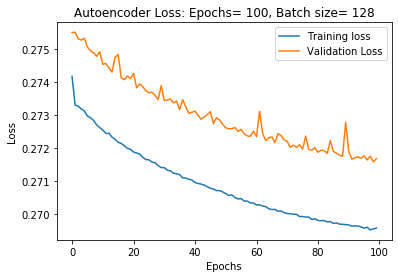

In [49]:
# Plotting loss vs epochs curves
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('Autoencoder Loss: Epochs= 100, Batch size= 128')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training loss', 'Validation Loss'], loc='upper right')
plt.show()

In [0]:
# Applying KMeans Algorithm on the AutoEncoder output
encoder = K.function([autoencoder.layers[0].input], [autoencoder.layers[4].output])
encoded_images_train = encoder([X_train])[0].reshape(-1,4*4*8)
encoded_images_test = encoder([X_test])[0].reshape(-1,4*4*8)
kmeans = KMeans(n_clusters=10)
clustered_train_set = kmeans.fit_predict(encoded_images_train)
clustered_test_set = kmeans.fit_predict(encoded_images_test)

In [51]:
# Accuracy using Normalized Mutual Information Score
print ("Training Accuracy: ", metrics.normalized_mutual_info_score(y_train, clustered_train_set)*100)
print ("Test Accuracy: ", metrics.normalized_mutual_info_score(y_test, clustered_test_set)*100)

Training Accuracy:  51.66737236253891
Test Accuracy:  54.84158803967273


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


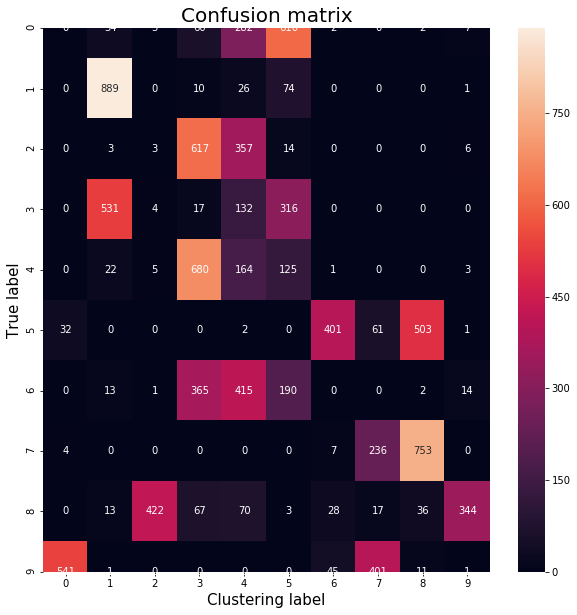

In [54]:
# Building and Plotting Confusion Matrix
cm = confusion_matrix(y_test, clustered_test_set)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix", fontsize=20)
plt.ylabel('True label', fontsize=15)
plt.xlabel('Clustering label', fontsize=15)
plt.show()

In [55]:
# Defining Method for Aligning Confusion Matrix to the Diagonals
def _make_cost_m(cm):
    s = np.max(cm)
    return (- cm + s)

indexes = linear_assignment(_make_cost_m(cm))
js = [e[1] for e in sorted(indexes, key=lambda x: x[0])]
cm2 = cm[:, js]

/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:127: DeprecationWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  DeprecationWarning)


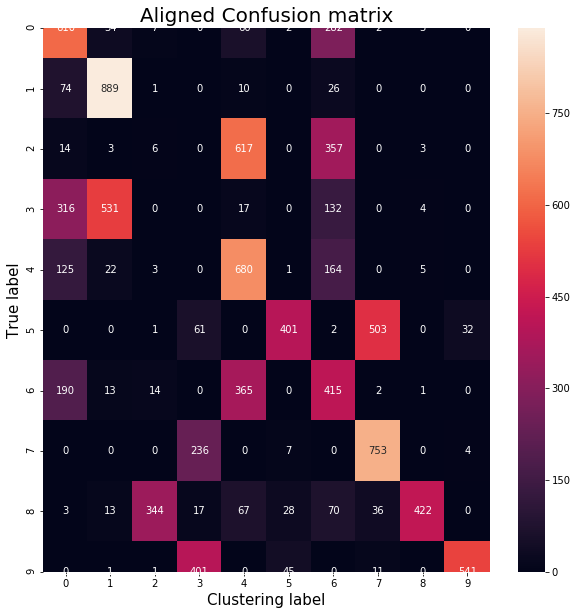

In [56]:
# Plotting Aligned Confusion Matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm2, annot=True, fmt="d")
plt.title("Aligned Confusion matrix", fontsize=20)
plt.ylabel('True label', fontsize=15)
plt.xlabel('Clustering label', fontsize=15)
plt.show()

# 3. GMM

In [0]:
# Applying Gaussian Mixture Model on the AutoEncoder output

gmm = GaussianMixture(n_components=10).fit(encoded_images_train)
probs_train = gmm.predict_proba(encoded_images_train)

gmm = GaussianMixture(n_components=10).fit(encoded_images_test)
probs_test = gmm.predict_proba(encoded_images_test)

In [66]:
# Converting one_hot representation to single value representation and printing Accuracy
y_pred_train=[]
for i in range(probs_train.shape[0]):
  y_pred_train.append(probs_train[i].argmax())

y_pred_test=[]
for i in range(probs_test.shape[0]):
  y_pred_test.append(probs_test[i].argmax())

print("Training Accuracy:",metrics.normalized_mutual_info_score(y_train, y_pred_train)*100)
print("Test Accuracy:",metrics.normalized_mutual_info_score(y_test, y_pred_test)*100)

Training Accuracy: 57.04611877569137
Test Accuracy: 60.32070528215204


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


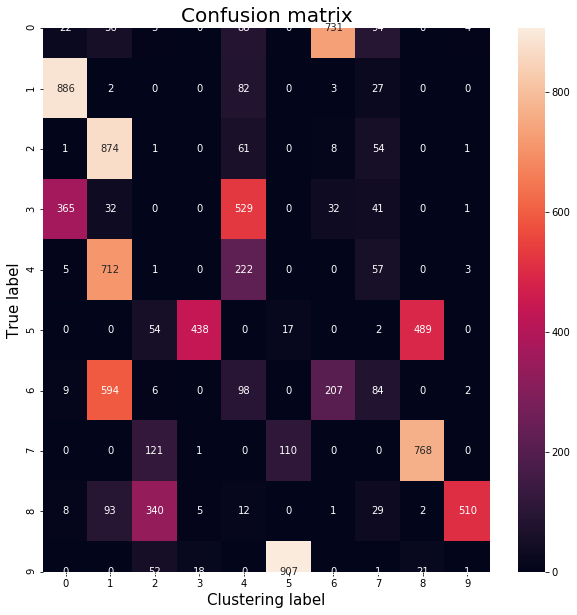

In [68]:
# Building and Plotting Confusion Matrix
cm3 = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10, 10))
sns.heatmap(cm3, annot=True, fmt="d")
plt.title("Confusion matrix", fontsize=20)
plt.ylabel('True label', fontsize=15)
plt.xlabel('Clustering label', fontsize=15)
plt.show()


In [69]:
# Aligning Confusion Matrix to the Diagonals
indexes = linear_assignment(_make_cost_m(cm3))
js = [e[1] for e in sorted(indexes, key=lambda x: x[0])]
cm4 = cm3[:, js]

/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:127: DeprecationWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  DeprecationWarning)


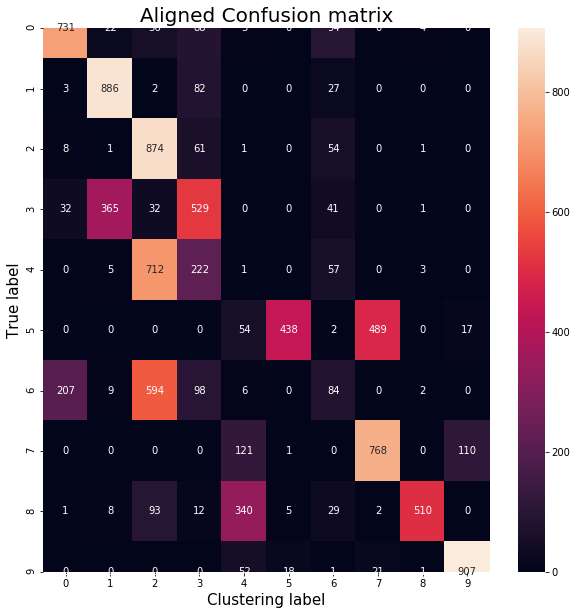

In [72]:
# Plotting Aligned Confusion Matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm4, annot=True, fmt="d")
plt.title("Aligned Confusion matrix", fontsize=20)
plt.ylabel('True label', fontsize=15)
plt.xlabel('Clustering label', fontsize=15)
plt.show()